<a href="https://colab.research.google.com/github/anmol0720/Facial-Recognition-Using-SVM/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats

#for advanced plotting
import seaborn as sns; sns.set() #Invoking

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import fetch_lfw_people

faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


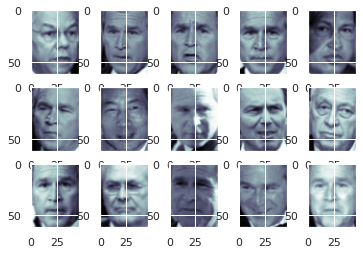

In [29]:
fig, ax=plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')

In [0]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca=RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(faces.data, faces.target, random_state=42)

Grid Search Cross Validation

To find the optimum Labels


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid={'svc__C':[1,5,10,50],
            'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,param_grid)
grid.fit(Xtrain,ytrain)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


*The values fall in the middle of the grid.Cool!*

*But if the values had been at the ends we would have expanded the values more to find the optimum values*

In [0]:
model=grid.best_estimator_

In [0]:
pred=model.predict(Xtest)

Visualizing the Test Images

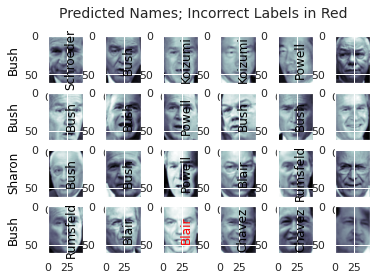

In [58]:
fig, ax =plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
  axi.set_ylabel(faces.target_names[pred[i]].split()[-1],
                 color='black' if pred[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red',size=14);